In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

Você é um analista de dados em uma empresa de vendas e deseja prever a receita de vendas de um vendedor com base no seu tempo de experiência na empresa, o número de vendas que ele realiza, e um fator sazonal que pode afetar os resultados (por exemplo, meses de alta e baixa demanda).

In [2]:
# Carregar os dados

df_vendas = pd.read_csv("./datasets/sales_data.csv")

In [3]:
df_vendas

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681
...,...,...,...,...
95,48,98,5,8966.193011
96,117,17,10,9261.522400
97,66,63,1,3317.040885
98,46,61,4,9868.930518


In [4]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [5]:
df_vendas.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


In [6]:
df_vendas_eda = df_vendas.copy()
df_vendas_bucketing = df_vendas.copy()

### EDA

In [7]:
df_vendas_eda.isna().sum()

tempo_de_experiencia    0
numero_de_vendas        0
fator_sazonal           0
receita_em_reais        0
dtype: int64

<Axes: xlabel='tempo_de_experiencia'>

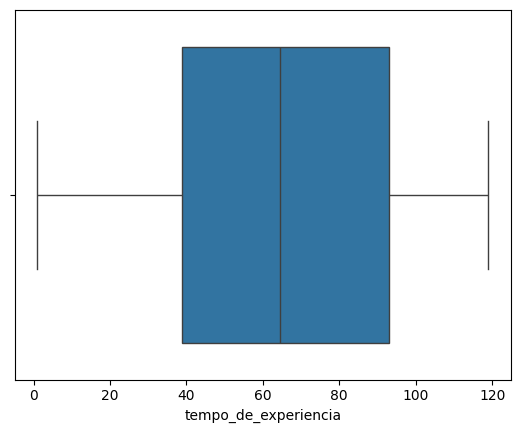

In [8]:
# Detectar outliers

sns.boxplot(df_vendas_eda, x='tempo_de_experiencia')

<Axes: xlabel='numero_de_vendas'>

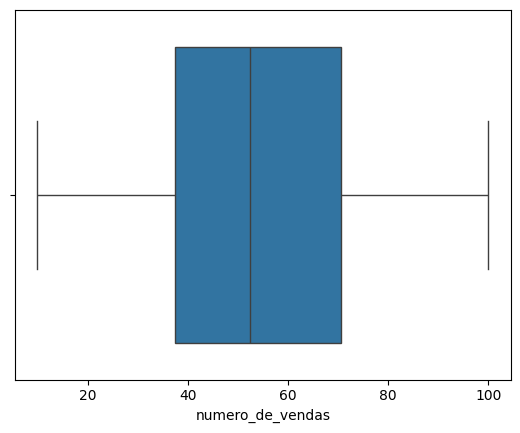

In [9]:
sns.boxplot(df_vendas_eda, x='numero_de_vendas')


<Axes: xlabel='fator_sazonal'>

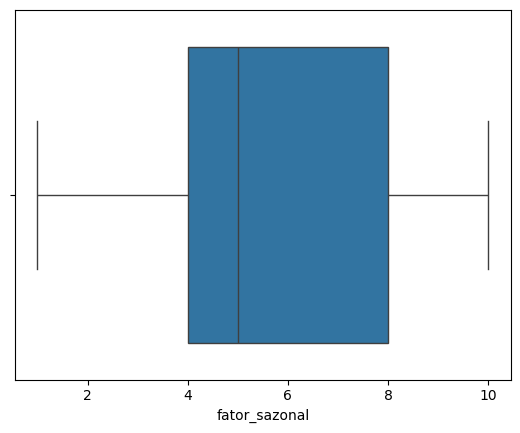

In [10]:
sns.boxplot(df_vendas_eda, x='fator_sazonal')


<Axes: xlabel='receita_em_reais'>

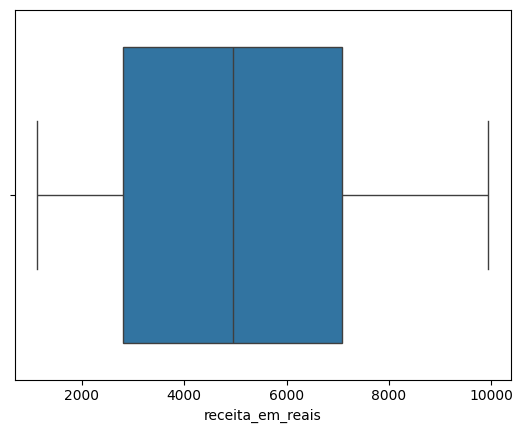

In [11]:
sns.boxplot(df_vendas_eda, x='receita_em_reais')

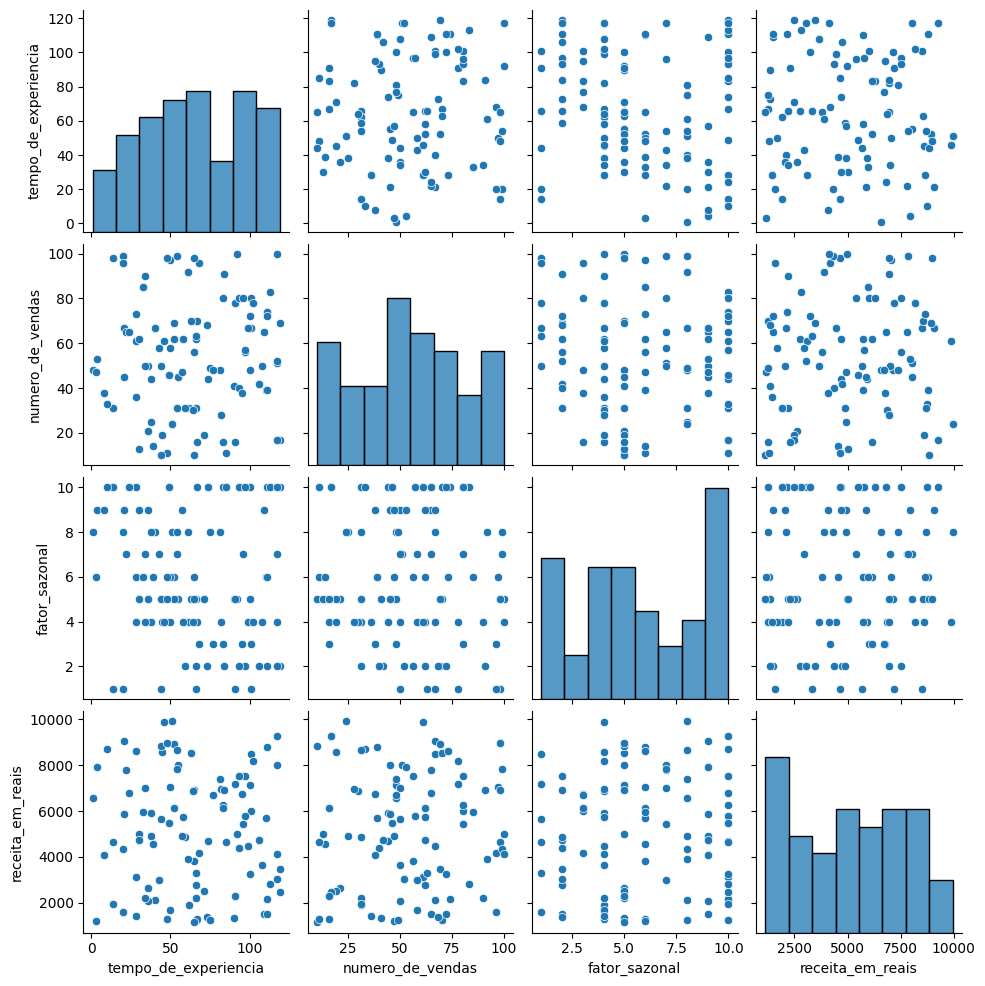

In [12]:
sns.pairplot(df_vendas_eda)

<Axes: >

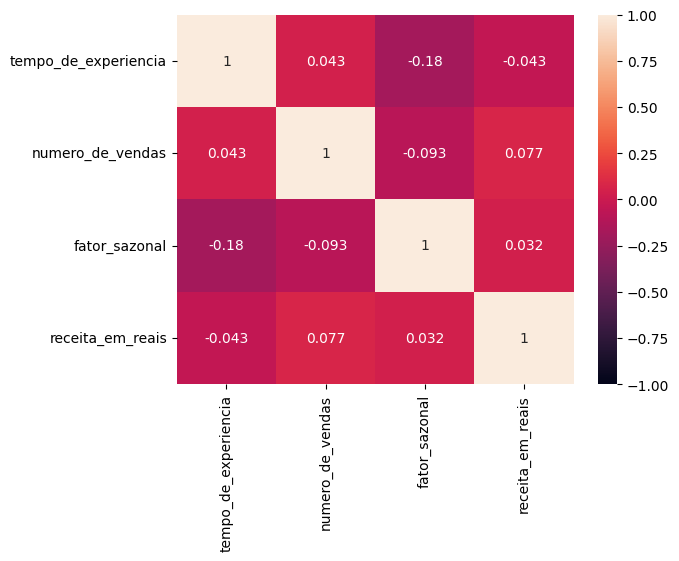

In [13]:
# mapa de calor do nivel co correlação

sns.heatmap(df_vendas_eda.corr(), vmin=-1, vmax=1, annot=True )

<Axes: >

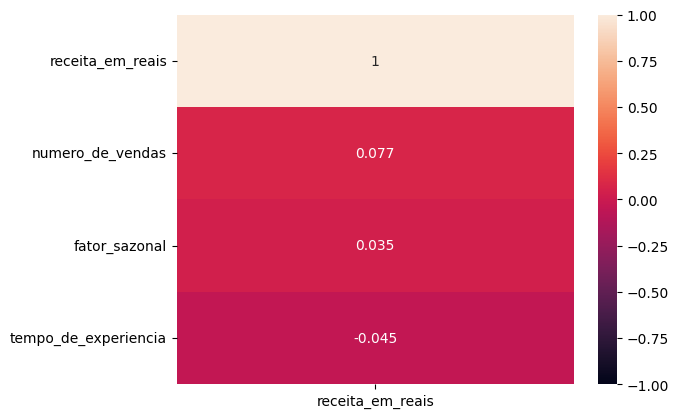

In [14]:
sns.heatmap(df_vendas_eda.corr('spearman')[['receita_em_reais']].sort_values(by='receita_em_reais', ascending=False), vmin=-1, vmax=1, annot=True )


### Treinar modelos

In [31]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error,root_mean_squared_error

import numpy as np

In [32]:
# separação de dados de treino e teste
X = df_vendas.drop(columns='receita_em_reais', axis=1)
y = df_vendas['receita_em_reais']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# regressao linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [34]:
# Avaliação do Modelo Linear
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'MSE Linear: {mse_linear}, R² Linear: {r2_linear}')

MSE Linear: 4839044.565665031, R² Linear: -0.06596934817736


In [35]:
# Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [36]:
# Avaliação do Modelo Polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print(f'MSE Polinomial: {mse_poly}, R² Polinomial: {r2_poly}')

MSE Polinomial: 3983443.6051544314, R² Polinomial: 0.12250678296776918


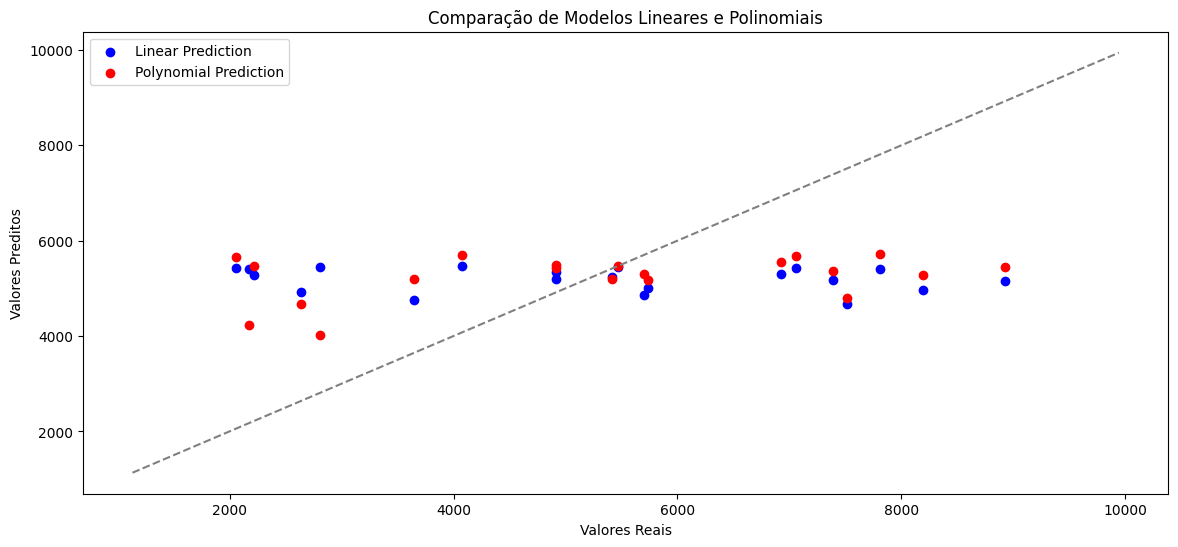

In [37]:
# Comparação Gráfica
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Prediction')
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title('Comparação de Modelos Lineares e Polinomiais')
plt.legend()
plt.show()

In [38]:
# Valores para previsão (substitua pelos valores do vendedor específico)
tempo_de_experiencia = 37
numero_de_vendas = 29
fator_sazonal = 5

# Modelo de Regressão Linear
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Use seus próprios dados de treinamento
receita_prevista_linear = linear_model.predict([[tempo_de_experiencia, numero_de_vendas, fator_sazonal]])

c:\Users\dccas\.virtualenvs\Desafio_-_Regressão_Polinominal-f3lntaBw\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
# Modelo de Regressão Polinomial
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)  # Use seus próprios dados de treinamento
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
X_test_poly = poly_features.transform([[tempo_de_experiencia, numero_de_vendas, fator_sazonal]])
receita_prevista_polinomial = poly_model.predict(X_test_poly)

c:\Users\dccas\.virtualenvs\Desafio_-_Regressão_Polinominal-f3lntaBw\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [40]:
print(f'Receita prevista (Modelo Linear): R$ {receita_prevista_linear[0]:.2f}')
print(f'Receita prevista (Modelo Polinomial): R$ {receita_prevista_polinomial[0]:.2f}')

Receita prevista (Modelo Linear): R$ 4965.05
Receita prevista (Modelo Polinomial): R$ 4828.85


In [41]:
# Defina os valores das variáveis para predição
tempo_de_experiencia_pred = 80  # meses de experiência
numero_de_vendas_pred = 150     # número de vendas
fator_sazonal_pred = 8          # fator sazonal

# Crie um array com os valores das variáveis para predição
X_new = np.array([[tempo_de_experiencia_pred, numero_de_vendas_pred, fator_sazonal_pred]])

# Predição usando Regressão Linear
y_pred_linear_new = linear_model.predict(X_new)
print(f'Predição com Regressão Linear para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_linear_new[0]:,.2f}')

# Transformação dos valores para Regressão Polinomial
X_new_poly = poly_features.transform(X_new)

# Predição usando Regressão Polinomial
y_pred_poly_new = poly_model.predict(X_new_poly)
print(f'Predição com Regressão Polinomial para os valores (tempo de experiência={tempo_de_experiencia_pred}, '
      f'número de vendas={numero_de_vendas_pred}, fator sazonal={fator_sazonal_pred}): '
      f'Receita Estimada = R$ {y_pred_poly_new[0]:,.2f}')

Predição com Regressão Linear para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 5,818.14
Predição com Regressão Polinomial para os valores (tempo de experiência=80, número de vendas=150, fator sazonal=8): Receita Estimada = R$ 4,300.52


c:\Users\dccas\.virtualenvs\Desafio_-_Regressão_Polinominal-f3lntaBw\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dccas\.virtualenvs\Desafio_-_Regressão_Polinominal-f3lntaBw\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
